In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# -----------rewards table
# mean, variance
reward_means = np.random.randint(1, 100, 10)
reward_std = np.floor(reward_means/3 * np.random.random(10))
print('Mean Rewards:', reward_means)
print ('Rewards Std deviation:', reward_std)

Mean Rewards: [66 36 45 41  6 66 31 45 79 77]
Rewards Std deviation: [ 5.  2.  4.  3.  0. 16.  1.  2.  8. 25.]


In [3]:
# create a reward set (sample from the rewards distribution)
def create_reward_set():
    reward_set = np.floor(np.random.normal(reward_means, reward_std, 10))
    return(reward_set)

print(create_reward_set())

[ 66.  38.  44.  48.   6.  60.  30.  44.  76. 117.]


In [4]:
# radom strategy
num_actions = 10
num_trials = 1000
total_reward = 0
actions_selected = []
total_maximum_reward = 0
maximum_reward_actions = []
rand_average_reward = []
max_average_reward = []

# run num_trials
for n in range(0, num_trials):
    reward_set = create_reward_set()
    # choose an action (reward) at random (Naive Strategy)
    action = np.random.randint(0, num_actions, 1)[0]
    # make a note of the action selected
    actions_selected.append(action)
    # get the reward for that action
    total_reward = total_reward + reward_set[action]
    rand_average_reward.append(total_reward/(n+1))
    maximum_reward_action = np.argmax(reward_set)
    maximum_reward_actions.append(maximum_reward_action)
    total_maximum_reward = total_maximum_reward + reward_set[maximum_reward_action]
    max_average_reward.append(total_maximum_reward/(n+1))

# print a summary 
print('Rewards Table:', reward_means)
print('Rewards Std deviation:', reward_std)
print('Actions Selected:\t', actions_selected)
print('Maximum reward actions:\t', maximum_reward_actions)
print('Random - Average reward over time', rand_average_reward)
print('Maximal - Average reward over time', max_average_reward)
print('Total Reward:', total_reward)
print('Expected Total rewards:', num_trials*np.mean(reward_means))
print('Maximum possible reward:', total_maximum_reward)

Rewards Table: [66 36 45 41  6 66 31 45 79 77]
Rewards Std deviation: [ 5.  2.  4.  3.  0. 16.  1.  2.  8. 25.]
Actions Selected:	 [1, 3, 5, 7, 7, 3, 4, 5, 7, 9, 6, 6, 3, 3, 5, 0, 6, 7, 6, 4, 4, 9, 4, 6, 6, 3, 2, 3, 6, 3, 4, 7, 0, 7, 0, 6, 0, 0, 4, 8, 3, 2, 9, 9, 7, 6, 5, 1, 5, 9, 7, 2, 4, 4, 3, 8, 0, 3, 7, 9, 3, 5, 8, 3, 8, 6, 5, 3, 9, 7, 1, 5, 4, 9, 0, 1, 3, 5, 2, 9, 5, 5, 8, 7, 8, 3, 6, 4, 6, 5, 6, 5, 5, 9, 4, 7, 0, 4, 5, 8, 0, 6, 1, 5, 2, 1, 7, 9, 8, 5, 2, 2, 7, 4, 1, 1, 2, 2, 4, 7, 1, 8, 6, 4, 4, 7, 7, 4, 8, 0, 6, 6, 3, 5, 5, 8, 8, 8, 9, 7, 6, 8, 7, 7, 1, 9, 1, 8, 0, 7, 8, 0, 0, 2, 5, 3, 3, 3, 6, 0, 7, 7, 0, 6, 4, 4, 3, 4, 6, 2, 9, 0, 8, 4, 9, 2, 0, 8, 0, 1, 0, 0, 5, 5, 9, 2, 0, 2, 7, 7, 9, 7, 7, 3, 8, 0, 3, 5, 0, 2, 6, 1, 2, 3, 8, 6, 6, 5, 1, 5, 8, 7, 6, 5, 4, 0, 1, 0, 1, 8, 0, 8, 2, 8, 7, 8, 1, 7, 1, 3, 6, 9, 2, 5, 0, 0, 6, 0, 2, 4, 2, 5, 8, 5, 8, 9, 9, 9, 4, 6, 9, 8, 5, 6, 4, 2, 7, 9, 7, 4, 9, 5, 4, 6, 3, 8, 4, 5, 2, 8, 1, 3, 3, 1, 7, 2, 0, 8, 2, 0, 7, 6, 0, 7, 2, 5, 3, 1, 8, 4

<Figure size 792x576 with 0 Axes>

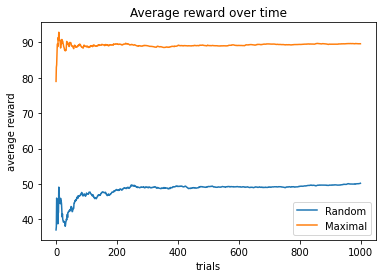

In [5]:
fig = plt.figure(figsize=(11,8))
t = np.arange(0, n+1, 1)
fig, ax = plt.subplots()
ax.plot(t, rand_average_reward, label='Random')
ax.plot(t, max_average_reward, label='Maximal')
ax.set(xlabel='trials', ylabel='average reward',
       title='Average reward over time')
plt.legend()
plt.show()

In [17]:
 #---------Epsilon-Greedy Strategy
num_actions = 10
num_trials = 10000
total_reward = 0
total_maximum_reward = 0
maximum_reward_actions = []
max_average_reward = []
average_egreedy_reward = []
total_egreedy_reward = 0
Q_table = [0.0]*num_actions
Q_table_counts = [0.0]*num_actions
epsilon = 0.9
action = None

print('Rewards Table:', reward_means)
print ('Rewards Std deviation:', reward_std)

# run num_trials
for n in range(0, num_trials):
    # choose between qtable runnin-average or random with 'epsilon' probablity
    choice = np.random.choice(['random', 'qtable'], p=[epsilon, 1-epsilon])
    if choice == 'qtable':
        # next action: take the action with the highest average Q_table value)
        action = np.argmax(Q_table)
    else:
        # next action: choose a random action
        action = np.random.randint(0, num_actions, 1)[0]
    
    # distribute the rewards
    reward_set = create_reward_set()

    # tabulate the maximums
    maximum_reward_action = np.argmax(reward_set)
    total_maximum_reward = total_maximum_reward + reward_set[maximum_reward_action]
    max_average_reward.append(total_maximum_reward/(n+1))
    maximum_reward_actions.append(maximum_reward_action)

    # average reward 
    total_egreedy_reward = total_egreedy_reward + reward_set[action]
    average_egreedy_reward.append(total_egreedy_reward/(n+1))
    # update the Q_table
    Q_table_counts[action] = Q_table_counts[action] + 1
    Q_table[action] = Q_table[action] + 1.0/Q_table_counts[action] * (reward_set[action] - Q_table[action]) 


print('Total Reward:', np.sum((np.multiply(Q_table, Q_table_counts))))
print('Avg Expected Total rewards', num_trials*np.mean(reward_means))
print('Total Maximum reward:', total_maximum_reward)
print('Qtable:', Q_table)
print('Qtable_counts:', Q_table_counts)
print('Epsilon:', epsilon, 'Num-Trials:', num_trials)


Rewards Table: [66 36 45 41  6 66 31 45 79 77]
Rewards Std deviation: [ 5.  2.  4.  3.  0. 16.  1.  2.  8. 25.]
Total Reward: 5172015.0000000065
Avg Expected Total rewards 4920000.0
Total Maximum reward: 8946274.0
Qtable: [65.55428193541265, 35.55789473684207, 44.497761361092465, 40.54041519434639, 6.0, 65.572892040977, 30.498992386923476, 44.46143587463883, 78.42536208901622, 76.30858646781438]
Qtable_counts: [9073.0, 9120.0, 8934.0, 9056.0, 8967.0, 8883.0, 8932.0, 8998.0, 18918.0, 9119.0]
Epsilon: 0.9 Num-Trials: 100000


<Figure size 792x576 with 0 Axes>

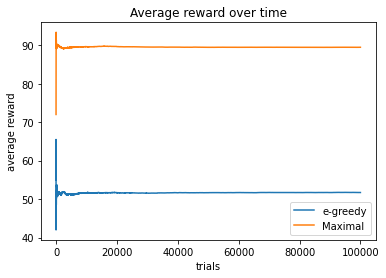

In [18]:
fig = plt.figure(figsize=(11,8))
t = np.arange(0, n+1, 1)
fig, ax = plt.subplots()
ax.plot(t, average_egreedy_reward, label='e-greedy')
ax.plot(t, max_average_reward, label='Maximal')
ax.set(xlabel='trials', ylabel='average reward',
       title='Average reward over time')
plt.legend()
plt.show()